# Practical Linear Algebra for Data Science

# Practical Linear Algebra for Data Science

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# setup animation
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')


# to read an image from a url (io) and convert it to grayscale (color)
from skimage import io,color
# convolution
from scipy.signal import convolve2d
from scipy.linalg import hilbert

import scipy


import pandas as pd
import sympy as sym
import time


# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

###### ============================
# Chapter 11
## General Linear Models and Least Squares


### GLM


$$X\beta=y \implies \beta=(X^TX)^{-1}X^Ty$$

Can be solved with code <u>np.linalg.lstsq(X,y,rcond=None)</u>

if $X$ is the matrix of known indepent parameters, and $y$ is the vector of known dependents, then finding $\beta$ will give us a model of the relationship between $X$ and $y$. This is called the <u><i><b>least square solution</b></i></u>.

Neat tip: If $XB=Y$ and $Y=I$, then by solving this equation $B$ will be the inverse of Y.

<u><i><b>Is the solution exact?</b></i></u> The solution is only exact if $y$ is in the column space of $X$.
So we allow a discripency $\epsilon$ in the result $X\beta=y+\epsilon$

<u><i><b>Geometric Intrerp:</b></i></u> Our goal is to find a set of coefficients $\beta$ such that the weighter lin combination of the columns of the vectors (the column space of vector $\matrix{C}(X)$ is the closest point to $y$, and the difference or projection vector is vector $\epsilon$. So $X^T\epsilon$ should be zero becuase they are ortogonal and from there $\implies \beta=(X^TX)^{-1}X^Ty$.

- We also can define it as a minimization porblem: $\min_{\beta}||\epsilon||^2=\min_{\beta}||X\beta-y||^2$

- If we have a constant (e.g., $mx+b=y$), then we can add the constant to the $X$ as a column of 1, an to $\beta$ as a new regressor in a row.

### LS via QR
To increase numerical stability and avoiding calculating inverse of X:

$$X\beta=y \implies QR\beta=y \implies \beta=R^{-1}Q^Ty$$

We can also solve this using RREF, by forming the equation as $R\beta=Q^Ty$. Then we use the augmented matrix $[R|Q^Ty]$ to calculate the RREF. NOTE that if X is tall, then use the "reduced" version of RREF function, so R hast the same number of rows as the uknown variables.


In [2]:
# defining predictors or independent vars
X=np.array([[1,70,177],[1,86,190],[1,63,180],[1,62,172]])
# defining observations or dependent vars
y=np.array([[175,181,159,165]]).T

#finding the left inverse. both of these methods return the same
X_leftinv1=np.linalg.inv(X.T@X)@X.T
X_leftinv=np.linalg.pinv(X)

B=X_leftinv@y

print(f'the soltuion to XB=y is:\n{B}\n')

print(f'Rank of X: {np.linalg.matrix_rank(X)}')

#finding if y is in the column space of X
Xy= np.hstack((X,y))
print(f'Rank of [X|y]: {np.linalg.matrix_rank(Xy)}')

e=X@B-y
print(f'The residual is XB-y (this is not zero if the two ranks above not equal):\n{np.round(e,3)}')

the soltuion to XB=y is:
[[276.85604056]
 [  1.51653185]
 [ -1.18716219]]

Rank of X: 3
Rank of [X|y]: 4
The residual is XB-y (this is not zero if the two ranks above not equal):
[[-2.114]
 [ 0.717]
 [-0.292]
 [ 1.689]]


(20, 2)


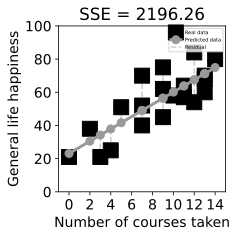

In [3]:
numcourses = [13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]
happiness  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]


# Build a statistical model with an intercept

# design matrix as a column vector
X = np.hstack((np.ones((20,1)),np.array(numcourses,ndmin=2).T))
print(X.shape)

# fit the model using the left-inverse
X_leftinv = np.linalg.inv(X.T@X) @ X.T

# solve for the coefficients
beta = X_leftinv @ happiness
beta

# let's plot it!

# predicted data
pred_happiness = X@beta


plt.figure(figsize=(3,3))

# plot the data and predicted values
plt.plot(numcourses,happiness,'ks',markersize=15)
plt.plot(numcourses,pred_happiness,'o-',color=[.6,.6,.6],linewidth=3,markersize=8)

# plot the residuals (errors)
for n,y,yHat in zip(numcourses,happiness,pred_happiness):
  plt.plot([n,n],[y,yHat],'--',color=[.8,.8,.8],zorder=-10)

plt.xlabel('Number of courses taken')
plt.ylabel('General life happiness')
plt.xlim([-1,15])
plt.ylim([0,100])
plt.xticks(range(0,15,2))
plt.legend(['Real data','Predicted data','Residual'],fontsize=5)
plt.title(f'SSE = {np.sum((pred_happiness-happiness)**2):.2f}')
plt.show()
     

Dot product: -0.0
Correlation: 0.0
 


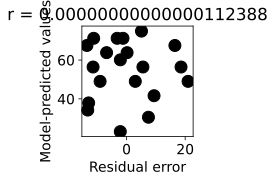

dim(  N(X)    ) = 18
dim( [N(X)|r] ) = 18


In [4]:
#Exer 1 and 2

# compute residual
res = happiness-pred_happiness


# should be zero + some error
print('Dot product: ' + str(np.round(np.dot(pred_happiness,res),2)))
print('Correlation: ' + str(np.round(np.corrcoef(pred_happiness,res)[0,1],2)))
print(' ')


# show in a plot
plt.figure(figsize=(2,2))
plt.plot(res,pred_happiness,'ko',markersize=12)
plt.xlabel('Residual error')
plt.ylabel('Model-predicted values')
plt.title(f'r = {np.corrcoef(pred_happiness,res)[0,1]:.20f}')
plt.show()


# the residual is orthogonal to the entire column space of the design matrix.

# I demonstrated this by showing that the residuals vector is in the left-null space of the design matrix.
# I did that by using scipy.linalg.null_space to find the left-null space, augmenting that null-space basis
# matrix by the residuals vector, and showing that the null space and augmented null space have the same rank.


# compute the null space (via scipy.linalg)
nullspace = scipy.linalg.null_space(X.T)


# augment the residuals
nullspaceAugment = np.hstack((nullspace,res.reshape(-1,1)) )


# print their ranks
print(f'dim(  N(X)    ) = {np.linalg.matrix_rank(nullspace)}')
print(f'dim( [N(X)|r] ) = {np.linalg.matrix_rank(nullspaceAugment)}')
     

In [5]:
M=20
N=3

X=np.random.randn(M,N)*3
y=np.random.randn(M,1)*5

#method 1: Left-Inverse
X_inv1=np.linalg.pinv(X)
X_inv2=np.linalg.pinv(X.T@X)@X.T

if(np.max(abs(X_inv1-X_inv2)))<0.00001:
    print(f'The two inverse methods return same matrix inverse')
else:
    print(f'ERRRROOOOORRR')

B_1 = X_inv1@y

#method 2: QR

Q,R=np.linalg.qr(X,"reduced")

print(f'Q: {Q.shape}, R: {R.shape}')

B_2 = np.linalg.pinv(R)@Q.T@y


#Method 3: RREF
Xy = np.hstack((R,Q.T@y))


symMat = sym.Matrix(Xy)
RREF = symMat.rref()[0]

RREF=np.array(RREF)
B_3=np.array([RREF[:,-1]]).astype(float)

print(f'Betas from Left-Inv:\n {np.round(B_1,3).T}')
print(f'Betas from QRE:\n {np.round(B_2,3).T}')
print(f'Betas from RREF:\n {np.round(B_3.T,3).T}\n')

print(f'R:\n{np.round(R,3)}')
print(f'R|QTy\n{np.round(Xy,3)}')
print(f'RREF(R|QTy)\n{np.round(RREF.astype(float),3)}')

The two inverse methods return same matrix inverse
Q: (20, 3), R: (3, 3)
Betas from Left-Inv:
 [[-0.305 -0.095 -0.207]]
Betas from QRE:
 [[-0.305 -0.095 -0.207]]
Betas from RREF:
 [[-0.305 -0.095 -0.207]]

R:
[[10.124  5.34  -3.816]
 [ 0.    13.878 -2.674]
 [ 0.     0.    -9.94 ]]
R|QTy
[[10.124  5.34  -3.816 -2.807]
 [ 0.    13.878 -2.674 -0.771]
 [ 0.     0.    -9.94   2.06 ]]
RREF(R|QTy)
[[ 1.     0.     0.    -0.305]
 [ 0.     1.     0.    -0.095]
 [ 0.     0.     1.    -0.207]]


In [6]:
#Exer 5
n=50
X=np.random.randn(n,n)
Y=np.eye(n)
Xinv_1=np.zeros_like(X)
for i in range(X.shape[0]):
    Xinv_1[:,i]=(np.linalg.pinv(X)@Y[:,i])
    
Xinv_2 = np.linalg.inv(X.T@X) @ X.T @ Y

Xinv_3 = np.linalg.inv(X)

print(np.round(np.sum(abs(Xinv_1@X-np.eye(n))),15))
print(np.round(np.sum(abs(Xinv_2@X-np.eye(n))),15))
print(np.round(np.sum(abs(Xinv_3@X-np.eye(n))),15))

1.5763e-11
8.150587e-09
1.7145e-11


In [7]:
A=np.linspace(0,3,12)

print(A)
print(A.shape)
print("\n")
A_r=A.reshape(3,-1)
print(A_r)
print(A_r.shape)

[0.         0.27272727 0.54545455 0.81818182 1.09090909 1.36363636
 1.63636364 1.90909091 2.18181818 2.45454545 2.72727273 3.        ]
(12,)


[[0.         0.27272727 0.54545455 0.81818182]
 [1.09090909 1.36363636 1.63636364 1.90909091]
 [2.18181818 2.45454545 2.72727273 3.        ]]
(3, 4)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# setup animation
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')


# to read an image from a url (io) and convert it to grayscale (color)
from skimage import io,color
# convolution
from scipy.signal import convolve2d
from scipy.linalg import hilbert


import pandas as pd


# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

###### ============================
# Chapter 9
## Orthogonal Matrices adn QR Decompositins


### Orthogonal Matrices
A matrix $Q$ is orthogonal, if:
- All columns are orthogonal
- The norm of each column is 1
- $||Qw||=||w||$ orthognal matrices only rotates vectors and do not scale them.

$$Q^TQ=I \implies <q_i,q_j>= \begin{cases} 0       & \text{if } i \neq j\\1  & \text{if } i=j \end{cases}$$

- The inverse of an oprthoonal matrix is its transpose $Q^{-1}Q=Q^TQ=I$ and $QQ^{-1}=QQ^T+I$
- All singular values and eigenvalues of an orthogonal matrix is 1.
- The norm of an orthogonal matrix is 1, so an orthogonal matrix can only rotate a vector, but it does not scale it.

### Gram-Schmidt Algorithm

Transforms a nonorthogonal matrix to an orthogonal one. (Also for basis to orthonormal basis)

If we want to orthogonize vector $V$ and $\{v_1,v_2,...,v_n\}$ are the columns:

- for $k$-th column $v_k$, we project it on all, columns before it $\{v_1, ..., v_{k-1}$ and then we find the orthogonal value to this plane.
$$q_k=v_k-\sum \limits_{i=1}^{k-1}\frac{v_k^Tv_i}{v_i^Tv_i}v_i=v_k - \texttt{projection of }v_k \texttt{on the previous vectors}$$


In [2]:
#Gram-Schmidt (Exer 2)

def GS_Alg(V):
    Q=np.zeros(V.shape)
    for i in range(V.shape[1]):
        # initialize
        Q[:,i] = A[:,i]
        # orthogonalize
        a = A[:,i] # convenience
        for j in range(i): # only to earlier cols
            q = Q[:,j] # convenience
            Q[:,i]=Q[:,i]-np.dot(a,q)/np.dot(q,q)*q
        Q[:,i] = Q[:,i] / np.linalg.norm(Q[:,i])
    return Q


A=np.random.randn(5,5)

Q1=GS_Alg(A)

QtQ = np.round(Q1.T@Q1,5)

print(QtQ)
print('\n')

#using numpy QR Function
Q2, R = np.linalg.qr(A)
print(np.round(Q2.T@Q2,5))

# Exer 1 Q^TQ=QQ^T=Q^-1Q=QQ^-1=I

Q=Q1.copy()

QtQ=np.round(Q.T@Q,5)
QQt=np.round(Q@Q.T,5)
QinvQ=np.round(np.linalg.pinv(Q)@Q,5)
QQinv=np.round(Q@np.linalg.pinv(Q),5)


print(np.linalg.norm(QtQ-np.eye(QtQ.shape[0]))==np.linalg.norm(QinvQ-np.eye(QinvQ.shape[0])))
    

[[ 1.  0. -0. -0.  0.]
 [ 0.  1.  0.  0. -0.]
 [-0.  0.  1. -0. -0.]
 [-0.  0. -0.  1. -0.]
 [ 0. -0. -0. -0.  1.]]


[[ 1. -0. -0.  0. -0.]
 [-0.  1.  0. -0.  0.]
 [-0.  0.  1.  0.  0.]
 [ 0. -0.  0.  1.  0.]
 [-0.  0.  0.  0.  1.]]
True


In [3]:
#Exer 3

A=np.random.randn(6,6)

Q,R = np.linalg.qr(A)
U=Q.copy()

Q,R = np.linalg.qr(U)

print(f'R obtained from QR decomp of an orthogonal matrice is I:\n{np.round(R,2)}\n')

# part 2: modulate the column norms so it is orthogonal but not normalized
for i in range(U.shape[0]):
    U[:,i] = U[:,i]*(10+i)

Q,R = np.linalg.qr(U)
print(f'R obtained from a not normalized columns of an orthogonal matric is I:\n{np.round(R,2)}\n')

# part 3: Change one matrix element
U=Q
U[0,3] = 0 # this is q_{1,4}

# QR decomp
Q,R = np.linalg.qr(U)

# show R and, for part 2, Q'Q
print(f'R obtained from a making one column not otthogonal to others in a orthogonal matric is I:\n{np.round(R,2)}\n')

R obtained from QR decomp of an orthogonal matrice is I:
[[ 1.  0.  0.  0. -0.  0.]
 [ 0.  1. -0.  0.  0.  0.]
 [ 0.  0.  1.  0. -0. -0.]
 [ 0.  0.  0.  1.  0. -0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.]]

R obtained from a not normalized columns of an orthogonal matric is I:
[[10.  0.  0.  0.  0.  0.]
 [ 0. 11. -0.  0.  0.  0.]
 [ 0.  0. 12.  0.  0. -0.]
 [ 0.  0.  0. 13.  0.  0.]
 [ 0.  0.  0.  0. 14.  0.]
 [ 0.  0.  0.  0.  0. 15.]]

R obtained from a making one column not otthogonal to others in a orthogonal matric is I:
[[ 1.    0.    0.   -0.17 -0.    0.  ]
 [ 0.    1.    0.   -0.01  0.    0.  ]
 [ 0.    0.    1.    0.17 -0.   -0.  ]
 [ 0.    0.    0.    0.93 -0.01  0.1 ]
 [ 0.    0.    0.    0.    1.    0.  ]
 [ 0.    0.    0.    0.    0.    0.99]]



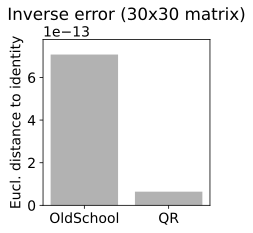

In [4]:
#Exer 4


def matrix_inverse(A):
    A_inv=np.zeros(A.shape)
    #calculating minor matrices and grod matrices
    minorMat = np.zeros(A.shape)
    gridMat  = np.zeros(A.shape)
        
    for i in range(minorMat.shape[0]):
        for j in range(minorMat.shape[1]):
            gridMat[i,j]=(-1)**(i+j)
            
            A_reduced = np.delete(A,i,axis=0)
            A_reduced = np.delete(A_reduced,j,axis=1)
            
            minorMat[i,j]=np.linalg.det(A_reduced)
                        
    # Cofactor matrix
    cofactMat = np.multiply(minorMat,gridMat)
    
    
    # Adjugate or inverse matrix
    A_inv = cofactMat.T/np.linalg.det(A)
    
    return A_inv


n = 30
A = np.random.randn(n,n)

# old-school inverse method
Ainv_old = matrix_inverse(A)
AAi_old  = Ainv_old@A

# via QR
Q,R = np.linalg.qr(A)
Ainv_qr = matrix_inverse(R)@Q.T
AAi_qr  = Ainv_qr@A



# differences
trueI = np.eye(n)
sse = [0,0] # sse = sum of squared errors
sse[0] = np.sqrt(np.sum((AAi_old-trueI)**2))
sse[1] = np.sqrt(np.sum((AAi_qr-trueI )**2))


# and plot
plt.figure(figsize=(3,3))

plt.bar(range(2),sse,color=[.7,.7,.7])
plt.xticks(range(2),labels=['OldSchool','QR'])
plt.ylim([0,np.max(sse)*1.1])
plt.ylabel('Eucl. distance to identity')
plt.title(f'Inverse error ({n}x{n} matrix)',ha='center')
plt.show()

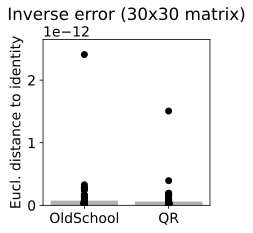

In [5]:
# run experiment

# matrix size
n = 30

numExprs = 100

sse = np.zeros((numExprs,2))

for expi in range(numExprs):

  # create matrix
  A = np.random.randn(n,n)

  # old-school inverse method
  Ainv_old = np.linalg.pinv(A)
  AAi_old  = Ainv_old@A

  # via QR
  Q,R = np.linalg.qr(A)
  Ainv_qr = np.linalg.pinv(R)@Q.T # using the old-school method
  # Ainv_qr = np.linalg.inv(R)@Q.T # using numpy's inv
  AAi_qr  = Ainv_qr@A

  # differences
  trueI = np.eye(n)
  sse[expi,0] = np.sqrt(np.sum((AAi_old-trueI)**2))
  sse[expi,1] = np.sqrt(np.sum((AAi_qr-trueI )**2))


# and plot
plt.figure(figsize=(3,3))

plt.plot(np.zeros(numExprs),sse[:,0],'ko')
plt.plot(np.ones(numExprs),sse[:,1],'ko')
plt.bar(range(2),np.mean(sse,axis=0),color=[.7,.7,.7])

plt.xticks(range(2),labels=['OldSchool','QR'])
plt.ylim([0,np.max(sse)*1.1])
plt.ylabel('Eucl. distance to identity')
plt.title(f'Inverse error ({n}x{n} matrix)',ha='center')
plt.show()

### QR Decomposition

Decomposes information of a matrix into an <u>orthogonal $Q$ and an upper triangulr $R$</u>:

$$A=QR \implies R=Q^TA$$

Since $Q^T=Q^{-1}$ for othogobal matrices, then we don not need to calculate the inverse of Q. And that's a benefit of QR decomp.

in NumPy: <u>np.linalg.qr()</u>



#### Sizes of Q and R

For $A_{M\times N}$:

- $Q$ is always full rank.
- For tall matrices ($M>N$) we can have full decomposition <u>np.linalg.qr(A,'complete')</u> Q will be squared with size $M\times M$ and rank $M$
- For tall matrices ($M>N$) we can have economy decomposition <u>np.linalg.qr(A,'reduced')</u> Q will be tall matrix with size $M\times N$ and rank $N$
- Rank of $R$ is always the same as $A$
- $Q$ spans all $R^M$, even if A is not full rank.


In addition:
- For a tall matrix (MXN), the $R$ matrix has the first N rows as a upper triangular matrix and the rest is zero. If we take the inverse of the first N rows and then pad it with zeros, it will give us the left-inverse matrix very easlily. See Exer 7.


#### QR Inverses
QR provides a more numerically stable way of inversing a matrix:

$$A=QR \implies A^{-1}=R^{-1}Q^T$$

In [6]:
A=np.random.randn(100,3)
Q,R=np.linalg.qr(A,'complete')
print(f'A is a tall matrix {A.shape}')
print(f'shape of Q, R with complete is Q:{Q.shape}, R:{R.shape}')
Q,R=np.linalg.qr(A,'reduced')
print(f'shape of Q, R with reduced is Q:{Q.shape}, R:{R.shape}')

A is a tall matrix (100, 3)
shape of Q, R with complete is Q:(100, 100), R:(100, 3)
shape of Q, R with reduced is Q:(100, 3), R:(3, 3)


In [7]:
#Exer 6

n = 30
Q,R = np.linalg.qr(np.random.randn(n,n))

# print out the norms
print( np.round(np.linalg.norm(Q,2),2),               # induced 2-norm
       np.round(np.sqrt(np.sum(Q**2))/np.sqrt(n),2) # manually computed Frobenius norm
)


# a random vector
v = np.random.randn(n,1)

# norms
norm_v  = np.linalg.norm(v)
norm_Qv = np.linalg.norm(Q@v)

# print them
print(np.round(norm_v,2),np.round(norm_Qv,2))

1.0 1.0
4.14 4.14


In [8]:
#Exer 7
# the matrix
A = np.random.randn(10,4)

# get R
Q,R = np.linalg.qr(A,'complete')

# examine R
print(f'R is:\n{np.round(R,3)}\n')
     

# invertible submatrix
Rsub = R[:4,:]

# inverses
Rsub_inv = np.linalg.inv(Rsub)
Rleftinv = np.linalg.pinv(R)

# print out both
print('Full inverse of R submatrix:')
print(np.round(Rsub_inv,3)), print(f'\n\n')

print('Left inverse of R:')
print(np.round(Rleftinv,3))

R is:
[[-4.056 -0.73  -0.803  1.453]
 [ 0.     3.36  -0.776  1.757]
 [ 0.     0.    -2.618 -1.741]
 [ 0.     0.     0.    -1.881]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]]

Full inverse of R submatrix:
[[-0.247 -0.054  0.092 -0.325]
 [ 0.     0.298 -0.088  0.36 ]
 [-0.    -0.    -0.382  0.353]
 [-0.    -0.    -0.    -0.532]]



Left inverse of R:
[[-0.247 -0.054  0.092 -0.325  0.     0.     0.     0.     0.     0.   ]
 [-0.     0.298 -0.088  0.36   0.     0.     0.     0.     0.     0.   ]
 [-0.     0.    -0.382  0.353  0.     0.     0.     0.     0.     0.   ]
 [-0.    -0.     0.    -0.532  0.     0.     0.     0.     0.     0.   ]]
